### Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  



#### 1. Defining the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

##### b) Defining the Metric for Success
The model will be considered a success when it is able to correctly and accurately indicate whether the patients in question have thyroids or not.

I look to using > 80% as a good target score for accuracy.

##### c) Understanding the context
The hospital would need to have a working system to group, classify and identify the infected patients from those who are not.

##### d) Recording the Experimental Design
- Perform EDA
- Visualize the Data

##### e) Data Relevance
The data was provided by the Moringa Data Science Program Education Department [https://ia803101.us.archive.org/3/items/hypothyroid/hypothyroid.csv].


##### f) Appropriateness of Data
Tests will be carried out to ensure that the data is approprraite for the study or whether additional data needs to be sourced

#### 2. Reading the Data
Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from tabulate import tabulate

import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA


In [3]:
# Before reading our dataset, we would like to ensure all columns are visible 
# ---
#  
pd.set_option("display.max.columns", None)

In [4]:
thyriod = pd.read_csv('https://ia903101.us.archive.org/3/items/hypothyroid/hypothyroid.csv')

### EDA

In [5]:
def preparation (df):

    # df = pd.read_csv(dataset)
 
    # print(f"\nShape of the Dataset:{df.head(5)}")
    print(f"\n Info of the Dataset:")
    print(f"\n {df.info()}")
    print(f"\n Shape of the Dataset:{df.shape}")
    print(f"\n Description of the Dataset:")
    print(f"\n {df.describe()}")
    
    return df

In [5]:
thyriod.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [6]:
thyriod.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

##### Data Preparation

In [7]:
preparation(thyriod)


 Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


#### Check For Missing values

In [8]:
 
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(thyriod)


,Total,Percentage


This Data Set has no missing values that will flaw the analysis and analysis

#### Check for Duplicates

In [10]:
# Check For Duplicate values
# occurrence based on all columns
duplicate = thyriod[thyriod.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,,y,55,y,0.93,y,60,n,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,,y,0.80,y,88,y,1.02,y,86,n,
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,


There seems to be duplicate values, however on closer look and analysis; the data seems to be of collected respondents hence data that will not affect the analysis hence leave it as it is

#### Replacing Special Characters to Integers

In [11]:

import re

dictionary = {re.compile('^[?]$'):''}


# Replace:

thyriod.replace(dictionary, regex=True, inplace=True)

Replace the '?' special character with the integer 0

#### Encoding all the non integer variables


In [12]:
# Display all the columns that are object type   

cols = thyriod.select_dtypes(include="object").columns.tolist()
cols


['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



In [14]:
thyriod_encoded = MultiColumnLabelEncoder(columns = ['status','age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']).fit_transform(thyriod)

 

In [15]:
# Checking the old and new shape of our dataset after some cleaning, plus calculating the percentage of data lost
print('Old Shape' +str(thyriod.shape))
print('New Shape' +str(thyriod_encoded.shape))
data_lost = thyriod.shape[0] - thyriod_encoded.shape[0]
percent = (data_lost / thyriod.shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(3163, 26)
New Shape(3163, 26)
Number of data samples lost: 0
Percent of data samples lost: 0.0


In [16]:
# Checking for Outliers using IQR method
# Defining a function to check for outliers

def outliers(data):
  # Calculating the first quantile
  Q1=data.quantile(0.25) 
  # Calculating the third quantile
  Q3 = data.quantile(0.75)
  # Calculating the Quartile Range
  IQR = Q3 - Q1 
  print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
  print('-------------------------------------------------------------------------------')
  #Displaying the number of outliers in the fields where the exist
  print(IQR)
outliers(thyriod_encoded)

      status    age    sex  on_thyroxine  query_on_thyroxine  \
0       True  False  False         False               False   
1       True  False  False          True               False   
2       True  False  False         False               False   
3       True  False  False         False               False   
4       True  False  False         False               False   
...      ...    ...    ...           ...                 ...   
3158   False  False  False         False               False   
3159   False  False  False         False               False   
3160   False  False  False         False               False   
3161   False  False  False         False               False   
3162   False  False  False          True               False   

      on_antithyroid_medication  thyroid_surgery  query_hypothyroid  \
0                         False            False              False   
1                         False            False              False   
2                 

There seems to be outliers on the data set. However on a closer look the outliers are critical to the analysis hence no action taken on them

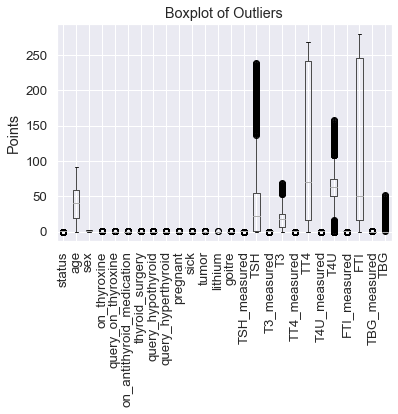

In [17]:
# let's check for outliers in the dataset using boxplot and give it a title and label

# let's create a function to plot the boxplot
def plot_boxplot(data,title,label):
    data.boxplot()
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Points')
    plt.show()

plot_boxplot(thyriod_encoded, 'Boxplot of Outliers', 'Points')

In [18]:
# Dealing with outliers
# We are using the trim method to deal with the outliers

columns=thyriod_encoded[['age','TSH','T3','TT4','T4U','FTI','TBG']]
# Iterating over the columns in our new dataframe to get the values that are not within the upper and lower limit
for index, c in columns.iteritems():
  # Defining the upper limit
  upper_limit=c.mean() + 3*c.std()
  # Defining the lower limit
  lower_limit=c.mean() - 3*c.std()
  # Applying the trim to our dataframe
  thyriod_encoded1 = thyriod_encoded[(c <= upper_limit) & (c >= lower_limit)]
# Checking the old shape and the new shape after the trim
print('Old Shape' +str(thyriod_encoded[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape))
print('New Shape' +str(thyriod_encoded1[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape))
data_lost = thyriod_encoded[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0] - thyriod_encoded1[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0]
percent = (data_lost / thyriod_encoded[['age','TSH','T3','TT4','T4U','FTI','TBG']].shape[0]) * 100
print("Number of data samples lost:", data_lost)
print("Percent of data samples lost:", round(percent, 2))

Old Shape(3163, 7)
New Shape(3033, 7)
Number of data samples lost: 130
Percent of data samples lost: 4.11


Data Lost is 4,11% which is not a big percentage of data to lose hence it being appropriate

In [20]:
# Printing the statistical information of our old and new dataset(after the trim)
print(tabulate(thyriod_encoded.describe(), headers='keys', tablefmt='psql'))
print(tabulate(thyriod_encoded1.describe(), headers='keys', tablefmt='psql'))

+-------+-------------+-----------+-------------+----------------+----------------------+-----------------------------+-------------------+---------------------+----------------------+--------------+--------------+--------------+----------------+--------------+----------------+-----------+---------------+-----------+----------------+----------+----------------+-----------+----------------+----------+----------------+------------+
|       |      status |       age |         sex |   on_thyroxine |   query_on_thyroxine |   on_antithyroid_medication |   thyroid_surgery |   query_hypothyroid |   query_hyperthyroid |     pregnant |         sick |        tumor |        lithium |       goitre |   TSH_measured |       TSH |   T3_measured |        T3 |   TT4_measured |      TT4 |   T4U_measured |       T4U |   FTI_measured |      FTI |   TBG_measured |        TBG |
|-------+-------------+-----------+-------------+----------------+----------------------+-----------------------------+-------------

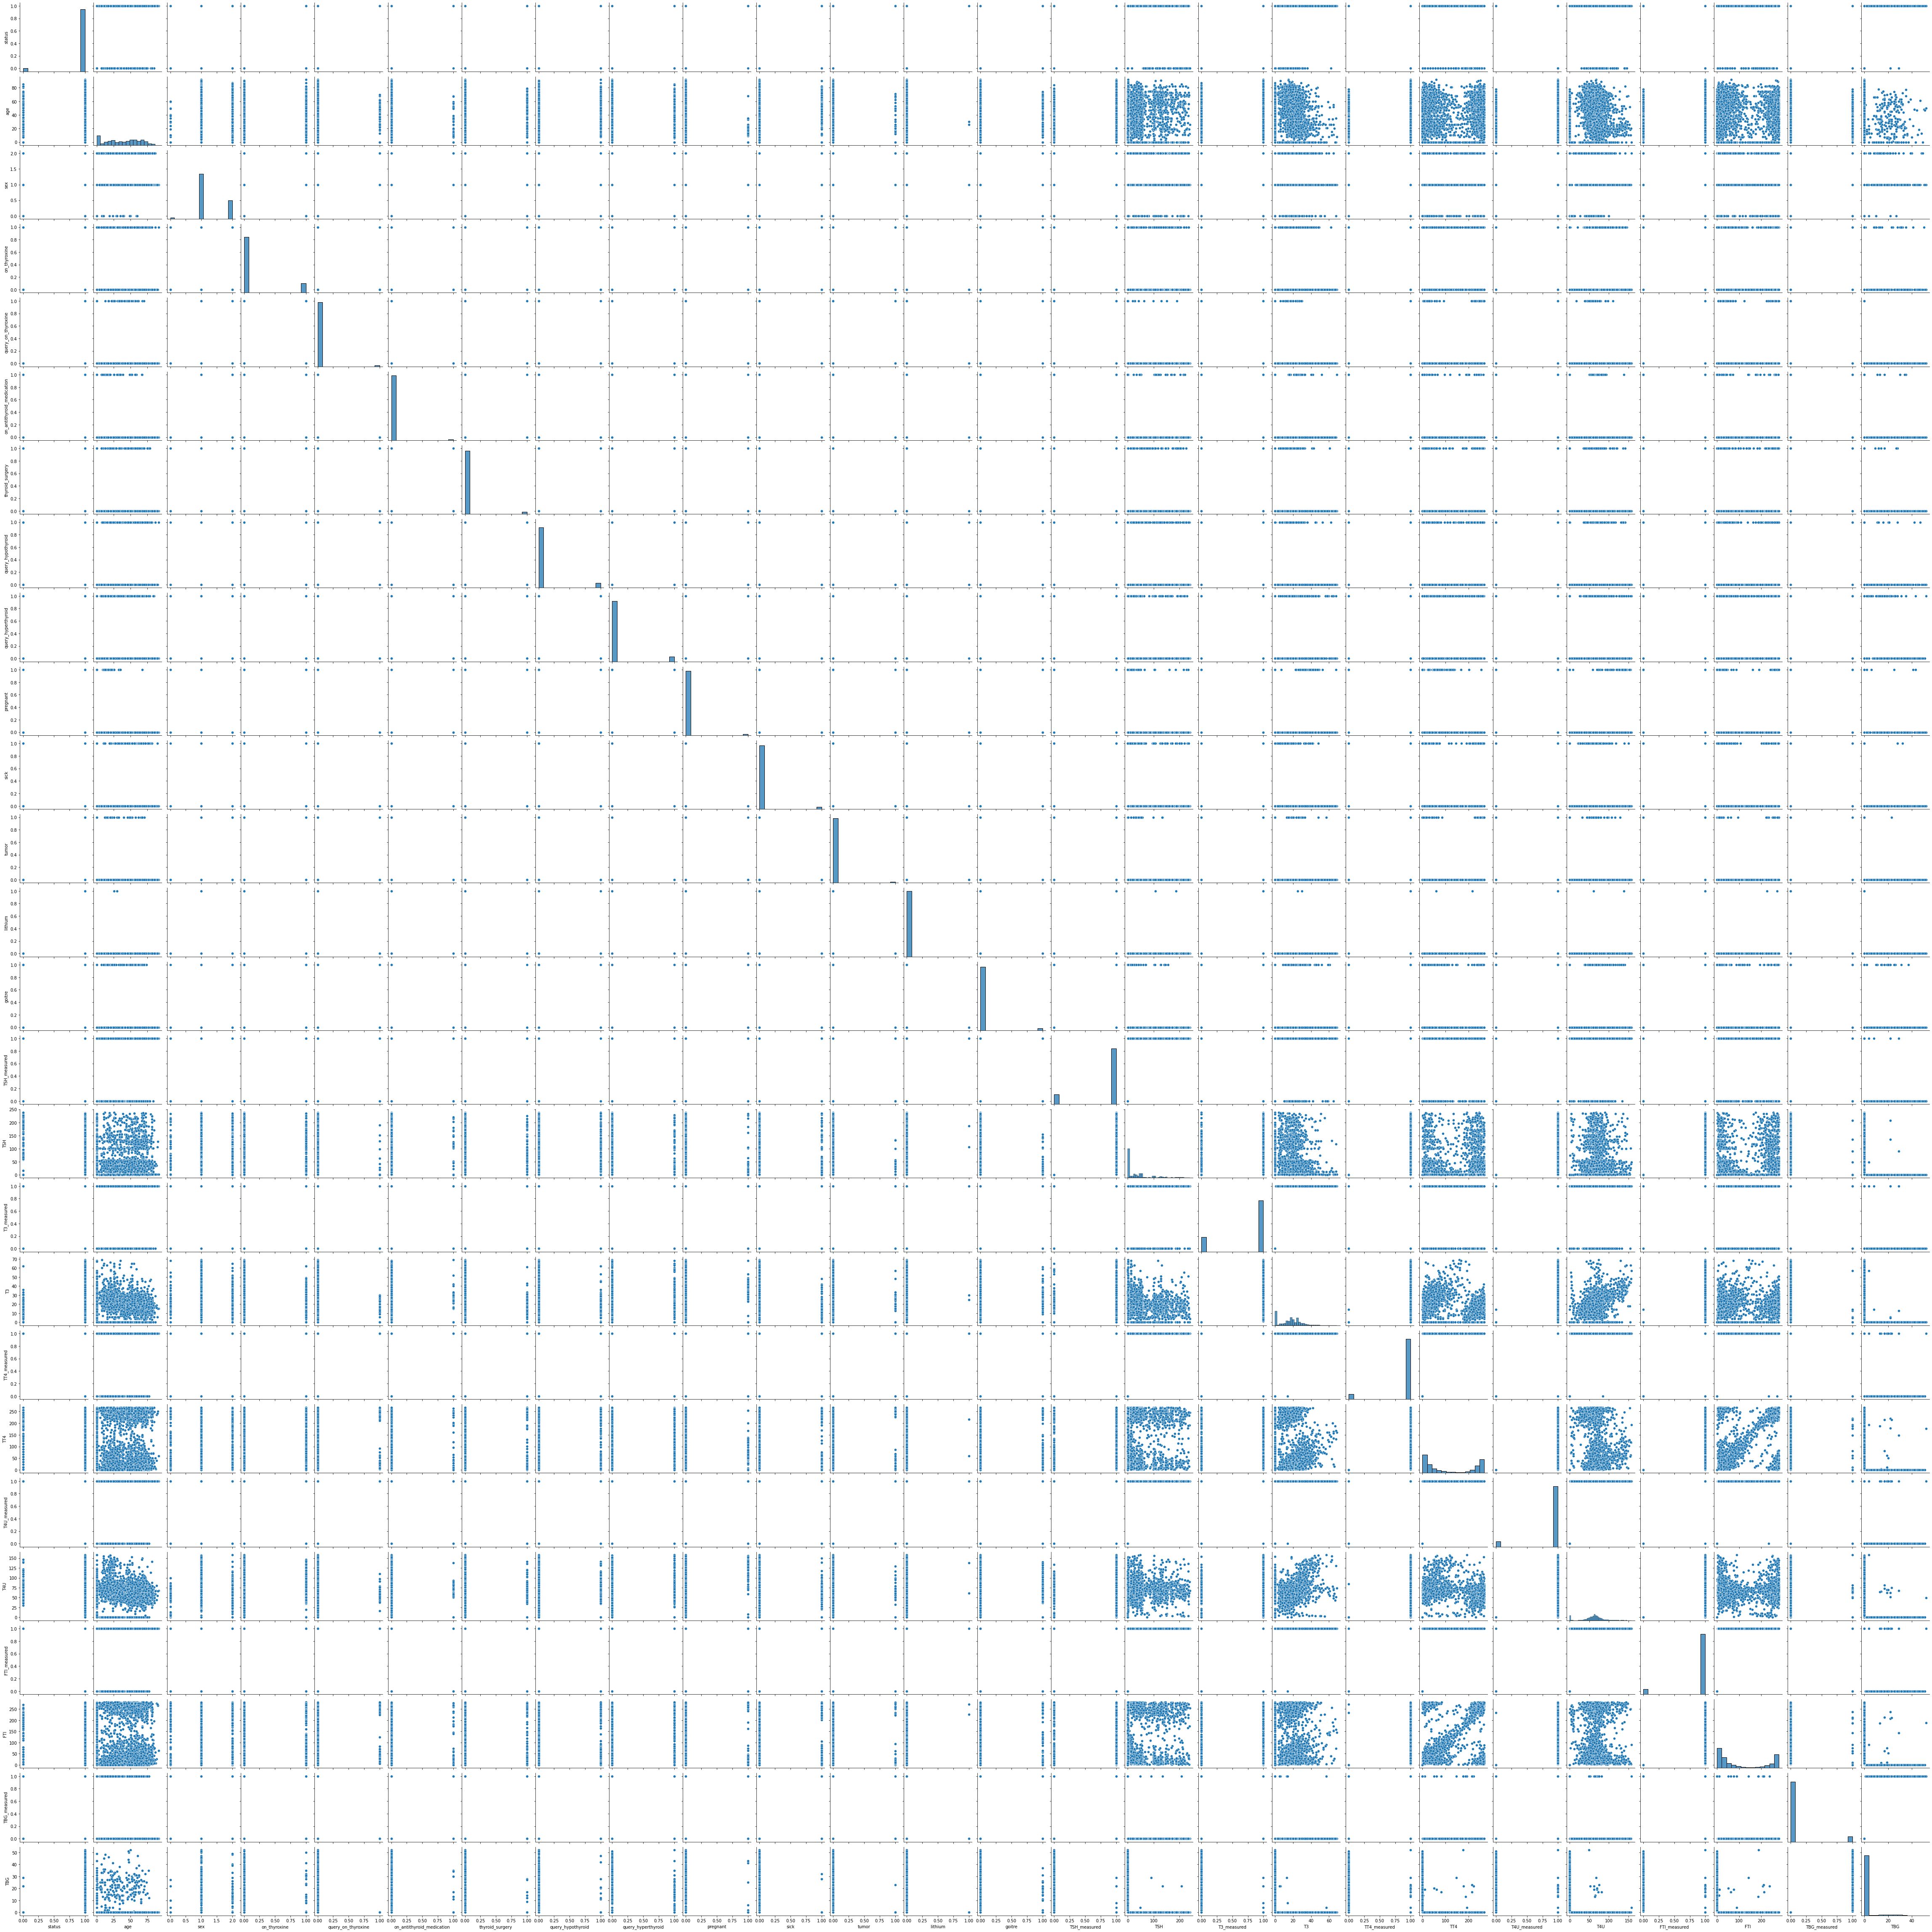

In [22]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(thyriod_encoded)
plt.show()

<AxesSubplot:title={'center':'\nCorrelation Matrix Of the Variables and Columns in the Thyroid Data Set'}>

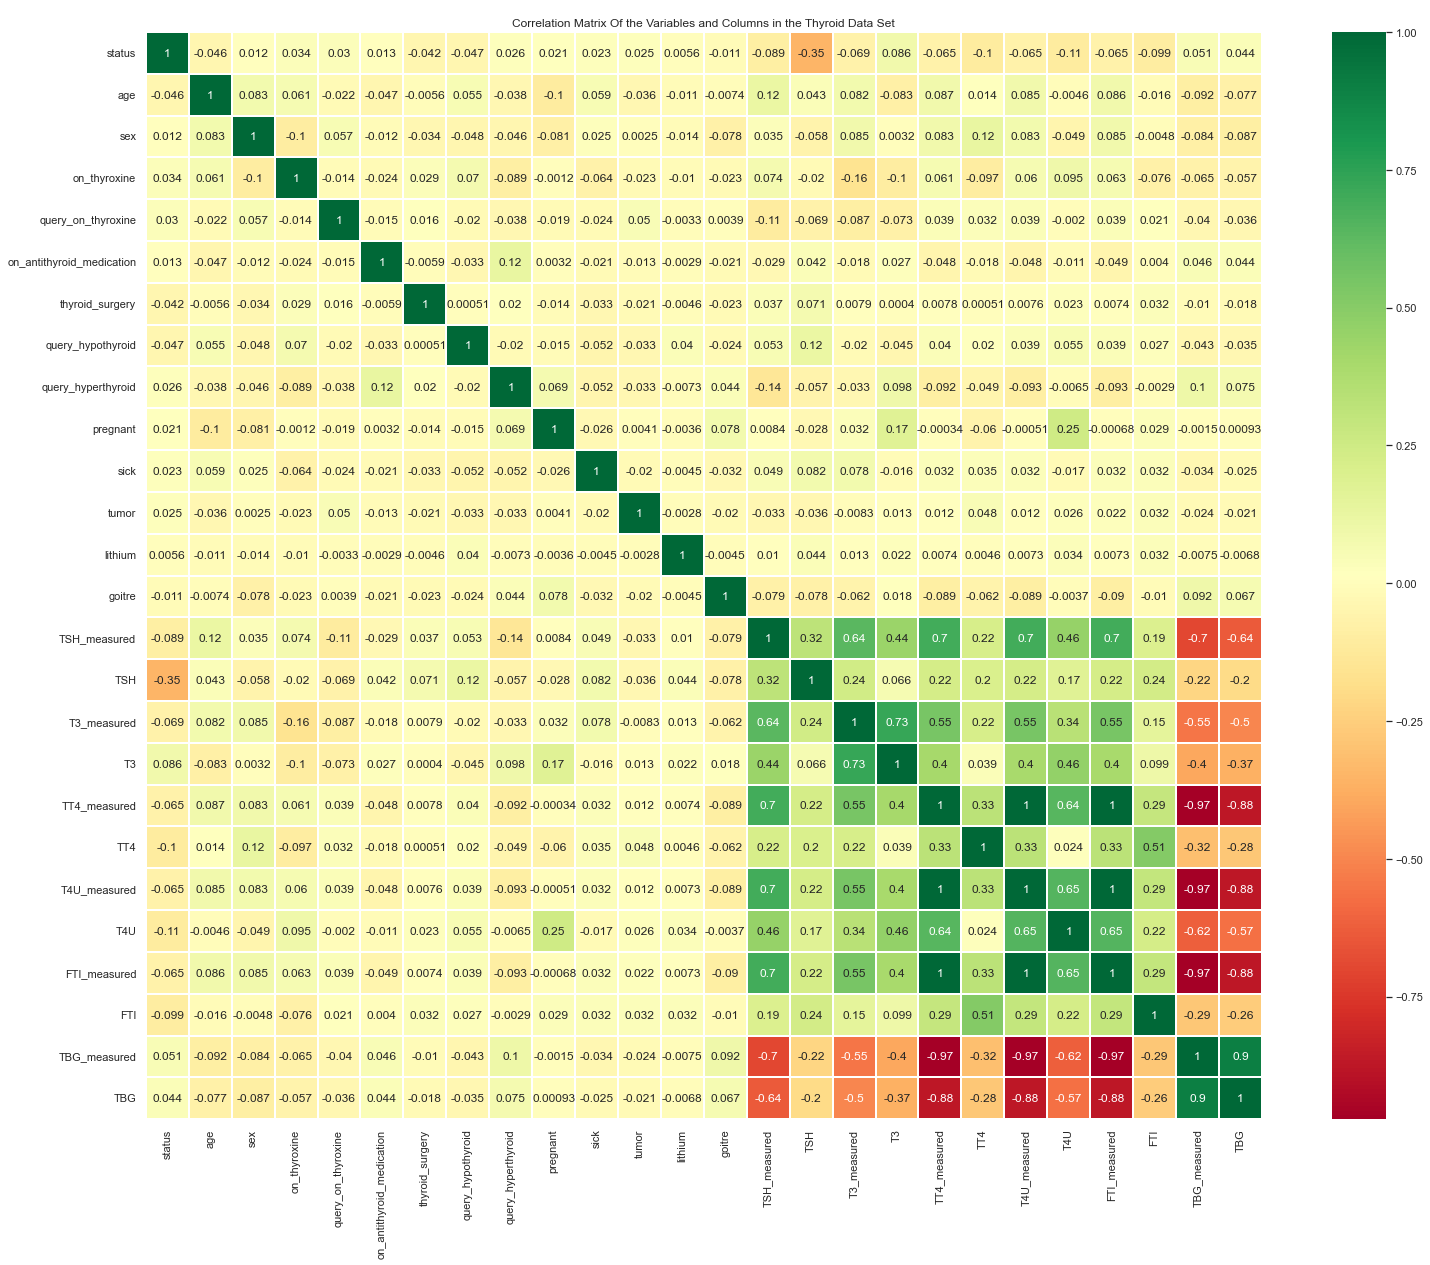

In [28]:
# Plotting a heatmap to show the correlation between the different numerical  variables
# let's use a heatmap to plot the correlation between the features

#specify size of heatmap
fig, ax = plt.subplots(figsize=(25, 20))
plt.title("\nCorrelation Matrix Of the Variables and Columns in the Thyroid Data Set")

#create seaborn heatmap
sns.heatmap(thyriod_encoded.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


Based on the Thyroid Studies; https://www.thyroid.org/thyroid-function-tests/ 

- The availability of Thyroid is measured by the low scores reported from TT4, FTI, TSH, T4U and TBG tests which is well depicted in the correlatin above as the high coeffecients explains that possibility 

##### 2.1. Random Forest Method 

In [31]:
acc_columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre''TSH_measured','T3_measured','FTI_measured','TBG_measured','T4U_measured', 'TT4_measured']
       
y = thyriod_encoded['status'].values

test_features = [ 'TSH',  'T3',  'TT4','T4U', 'FTI',  'TBG']
       
X = thyriod_encoded[test_features].values

In [32]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.955329
std,0.198617,0.152415
min,0.000000,0.115984
25%,1.000000,0.997226
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.03909415309539183
Mean Squared Error: 0.019624950002095184
Root Mean Squared Error: 0.1400890788109308


In [35]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)

In [36]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('TSH', 0.25), ('T3', 0.16), ('TT4', 0.11), ('T4U', 0.09), ('FTI', 0.4), ('TBG', 0.0)]

Variable: FTI                  Importance: 0.4
Variable: TSH                  Importance: 0.25
Variable: T3                   Importance: 0.16
Variable: TT4                  Importance: 0.11
Variable: T4U                  Importance: 0.09
Variable: TBG                  Importance: 0.0


- The most imortant test to determine thyroid based on this sample is FTI as depicted above. The free T4 index (FTI) is a blood test used to diagnose thyroid disorders. T4, also called thyroxine, is a thyroid hormone. The test measures how much of it is in your blood to help determine whether your thyroid gland is underactive (hypothyroidism) or overactive (hyperthyroidism).

- The TBG blood test measures the level of a protein that moves thyroid hormone throughout your body. This protein is called thyroxine binding globulin (TBG). Blood is drawn from a vein (venipuncture), usually from the inside of the elbow or the back of the hand. However the sample data set we have seems to work differently as the test does not afffect the stats of a patient having Thyriods or not.

- The other tests in order of importance are:
2. TSH
3. T3
4. TT4
5. T4U

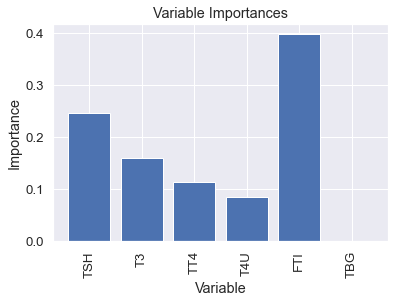

In [37]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The model clearly shows the most important variables that positively influence the test being positive for thyroid:

- FTI 
- TSH
- T3
- TT4
- T4U

#### 2.2. Gradient Boosting Classifier

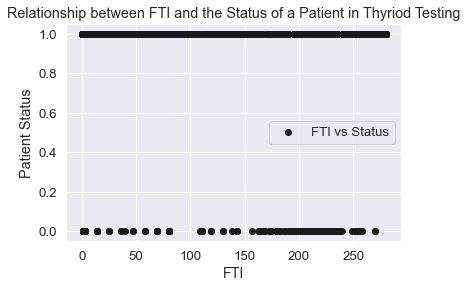

In [72]:

# y = thyriod_encoded['status'].values
y = thyriod_encoded['status'].values

test_features = ['FTI']

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = thyriod_encoded[test_features].values

# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="FTI vs Status")
plt.xlabel("FTI")
plt.ylabel("Patient Status")
plt.title("Relationship between FTI and the Status of a Patient in Thyriod Testing")
plt.legend()
plt.show()

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[  0  26]
 [  0 607]]


0.9589257503949447

Model explained by 95% accuracy

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
# tree = DecisionTreeRegressor(max_depth=30)
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

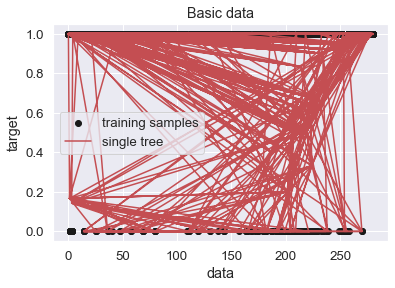

In [93]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

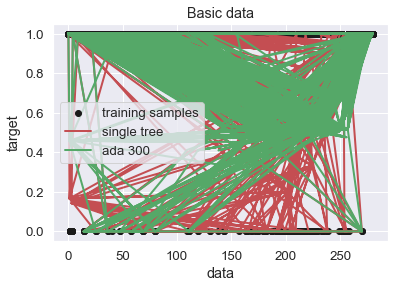

In [46]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
# ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),
#                           n_estimators=300, random_state=0)
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

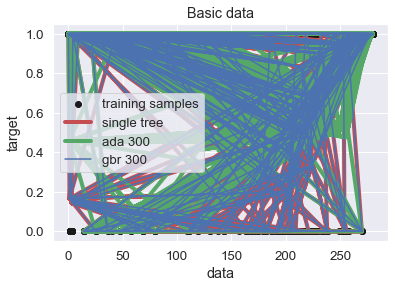

In [47]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=8)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

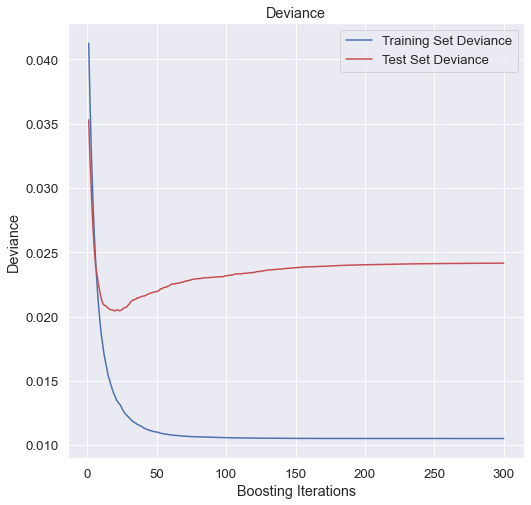

In [48]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()

In [49]:

from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [51]:

y = thyriod_encoded['status'].values

test_features = ['FTI']

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = thyriod_encoded[test_features].values

In [52]:
X,y = thyriod_encoded.drop('status',axis=1),thyriod_encoded['status']
kf = KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,val_index in kf.split(X):
    X_train,X_val = X.iloc[train_index],X.iloc[val_index],
    y_train,y_val = y.iloc[train_index],y.iloc[val_index],

In [53]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.99      0.99      0.99       604

    accuracy                           0.98       632
   macro avg       0.89      0.91      0.90       632
weighted avg       0.98      0.98      0.98       632



Our Model has 89% accuracy

#### 3. SVM

In [54]:
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
thyriod_encoded.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,68,2,0,0,0,0,0,0,0,0,0,0,0,1,135,1,8,1,56,1,117,1,3,0,0
1,0,7,1,1,0,0,0,0,0,0,0,0,0,0,1,80,1,19,1,100,1,82,1,80,0,0
2,0,16,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,1,194,1,69,1,1,0,0
3,0,16,1,0,0,0,0,0,0,0,0,0,0,0,1,159,1,6,1,220,1,73,1,221,0,0
4,0,73,2,0,0,0,0,0,0,0,0,0,0,0,1,201,1,14,1,217,1,97,1,197,0,0


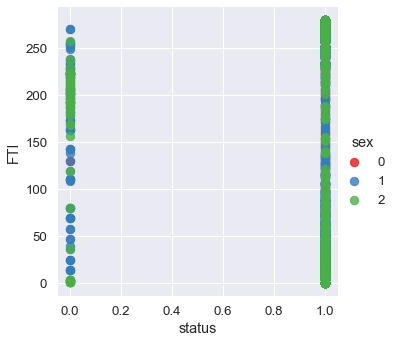

In [94]:
# Plotting our desired features
sns.lmplot('status','FTI', data=thyriod_encoded, hue='sex', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

#### Fitting the Model

In [95]:
# Specify the input for the model
thyroid_test = thyriod_encoded[['status','FTI']].to_numpy()

# Convert the data type for 'Type' column from object to category
thyriod_encoded['status'] = thyriod_encoded['status'].astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
type_label =thyriod_encoded['status'].cat.codes
print(type_label)

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(thyroid_test,type_label)

0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3163, dtype: int8


#### Vizualization

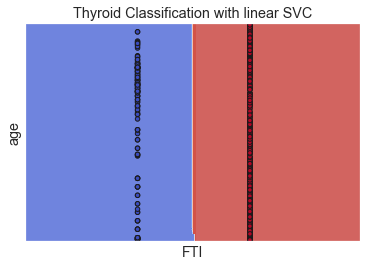

In [96]:

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Classification with linear SVC')
# Set-up grid for plotting.
X0, X1 = thyroid_test[:, 0], thyroid_test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=type_label, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('age')
ax.set_xlabel('FTI')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [97]:

def thyroid_test(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You have No Thyriod!')
    elif(model.predict([[flour,sugar]]))==1:
        print('You have Thyroids!')
    else:
      print('You\'re looking at a Test for Thyroids!')

# Predict if 60 parts flour and 30 parts butter
thyroid_test(1500, 1050)

You have Thyroids!


#### Polynomial Function

Data Exploration


In [98]:
thyriod_encoded.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,68,2,0,0,0,0,0,0,0,0,0,0,0,1,135,1,8,1,56,1,117,1,3,0,0
1,0,7,1,1,0,0,0,0,0,0,0,0,0,0,1,80,1,19,1,100,1,82,1,80,0,0
2,0,16,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,1,194,1,69,1,1,0,0
3,0,16,1,0,0,0,0,0,0,0,0,0,0,0,1,159,1,6,1,220,1,73,1,221,0,0
4,0,73,2,0,0,0,0,0,0,0,0,0,0,0,1,201,1,14,1,217,1,97,1,197,0,0


In [99]:
# The way the dataset is right now, it would be difficult to plot the graph on a 2-Dimencional plane because the dataset has 4 features. 
# Therefore we need to reduce the feature by applying a reduction algorithm.

# Removing the target column
iris = thyriod_encoded
y = thyriod_encoded['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(iris)
X = pca.transform(iris)
X.shape

(3163, 2)

Split the data into train and test sets

In [100]:
# Convert the data type for 'Class' column from object to category
y = y.astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Fitting the model: Polymomial function

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)
SVC(gamma='auto', kernel='poly')

Visualization

In [ ]:

# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = polyclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Thyroid Discovery Classification with polynomial SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, polyclassifier, xx, yy, cmap=plt.cm.Paired, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.Paired, s=20, edgecolors='k')
# ax.set_ylabel()
# ax.set_xlabel()
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Making Predictions

In [ ]:


# making prediction
y_pred = polyclassifier.predict(X_test)


In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting the model: Radial basis function (rbf)

In [ ]:

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

In [ ]:
# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = rbfclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with rbf SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, rbfclassifier, xx, yy, cmap=plt.cm.autumn, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.autumn, s=20, edgecolors='k')

ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

Optimization: Parameter tuning

In [ ]:
# making prediction
y_pred = rbfclassifier.predict(X_test)


In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Fitting the model: Sigmoid function

In [ ]:

# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

Visualization

In [ ]:


# Create a mesh grid for our graph
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# A function that creates the hyperplanes from our model
def plot_contours(ax, clf, xx, yy, **params):
    Z = sigclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Flower Classification with sigmoid SVC')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, sigclassifier, xx, yy, cmap=plt.cm.cool, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.cool, s=20, edgecolors='k')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [ ]:
# making prediction
y_pred = sigclassifier.predict(X_test)


In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))